In [10]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
abc = string.ascii_lowercase
indic = []

In [11]:
indic = []
for i in abc:
    indic.append(i)
valores = np.arange(10.0,36.0)

In [12]:
A = pd.Series(data=valores, index=indic, dtype='int')

In [13]:
indB = indic
for i in range(len(indic)):
    indB[-i] = indic[i]
B = pd.Series(data=indic, index=valores,dtype='string')

In [14]:
A['d':'i']

d    13
e    14
f    15
g    16
h    17
i    18
dtype: int32

In [15]:
df_1 = pd.read_csv('GCB2022v27_MtCO2_flat.csv')
#df_1 = df_1.fillna(0)

In [16]:
#1Desplegar nombres de las columnas, tipos de datos, distribucion de nans
print('Columnas\n',df_1.columns, '\n ................')
print('Numero de Nans por Columna\n',df_1.isna().sum(axis=0), '\n...................\nInformacion sobre los Datos del DataFrame\n')
print(df_1.info())

Columnas
 Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object') 
 ................
Numero de Nans por Columna
 Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64 
...................
Informacion sobre los Datos del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4

In [17]:
#2) De cuantos países Diferentes hay datos
num_paises = len(df_1['Country'].unique())
print('Numero de paises:',num_paises)

Numero de paises: 232


In [18]:
#3)Graficar los valores globales y de mexico 
df_1 = df_1.fillna(0)#Sustituimos NANs por 0's
md = df_1['Country'] == 'Mexico' #en md generamos un array boleano donde sera true solo los años donde este mexico

mx_list =list('01234567')
#A cada elemento de la lista le asignaremos un array de datos, que son la columna n-esima del dataframe, pero unicamente con los datos que cumplen el filtro de la ubicacion de mexico
mx_list[0] = np.array(df_1[['Total']].loc[md]) #mx_list0 es un arreglo de los datos de df_1 de la columna total que cumplen con el filtro de mexico
mx_list[1] =  np.array(df_1[['Coal']].loc[md])
mx_list[2] =  np.array(df_1[['Oil']].loc[md])
mx_list[3] =  np.array(df_1[['Gas']].loc[md])
mx_list[4] =  np.array(df_1[['Cement']].loc[md])
mx_list[5] =  np.array(df_1[['Flaring']].loc[md])
mx_list[6] =  np.array(df_1[['Other']].loc[md])
mx_list[7] =  np.array(df_1[['Per Capita']].loc[md])
#hacemos lo mismo para los datos globales
gd = df_1['Country'] == 'Global'
g_list =[0,1,2,3,4,5,6,7]
g_list[0] = np.array(df_1[['Total']].loc[gd])
g_list[1] = np.array(df_1[['Coal']].loc[gd])
g_list[2] = np.array(df_1[['Oil']].loc[gd])
g_list[3] = np.array(df_1[['Gas']].loc[gd])
g_list[4] =  np.array(df_1[['Cement']].loc[gd])
g_list[5] =  np.array(df_1[['Flaring']].loc[gd])
g_list[6] =  np.array(df_1[['Other']].loc[gd])
g_list[7] =  np.array(df_1[['Per Capita']].loc[gd])
#Comparación Anual
#tomamos los años como indices
indic = np.arange(1750,2022)
#en una columna pondremos los datos globales y en la otra los datos de Mexico
col = ['1']
columnas = ['Total Global','Total Mexico','Coal Global','Coal Mexico','Oil Global','Oil Mexico','Gas Global','Gas Mexico','Cement Global','Cement Mexico','Flaring Global','Flaring Mexico','Other Global','Other Mexico','Per Capita Global','Per Capita Mexico']
#Generamos el DataFrame nuevo
analisis = pd.DataFrame(index = indic, columns = col )
j = 0
for i in columnas:
    if 'Global' in i:
        analisis[i] = g_list[j]
        j = j + 1
    else:
        analisis[i] = mx_list[j-1]
analisis

,1,Total Global,Total Mexico,Coal Global,Coal Mexico,Oil Global,Oil Mexico,Gas Global,Gas Mexico,Cement Global,Cement Mexico,Flaring Global,Flaring Mexico,Other Global,Other Mexico,Per Capita Global,Per Capita Mexico
1750,NaN,9.350528,0.000000,9.350528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.011492,0.000000
1751,NaN,9.350528,0.000000,9.350528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.011438,0.000000
1752,NaN,9.354192,0.000000,9.354192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.011390,0.000000
1753,NaN,9.354192,0.000000,9.354192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.011339,0.000000
1754,NaN,9.357856,0.000000,9.357856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.011294,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,NaN,36096.739276,465.620953,14506.973805,48.529680,12242.627935,245.839744,7144.928128,143.251408,1507.923185,20.876858,391.992176,7.123264,302.294047,0.0,4.749682,3.790490
2018,NaN,36826.506600,475.268909,14746.830688,47.313232,12266.016285,233.825488,7529.846784,165.905920,1569.218392,20.863843,412.115746,7.360426,302.478706,0.0,4.792753,3.832385
2019,NaN,37082.558969,472.191499,14725.978025,45.268010,12345.653374,241.897149,7647.528220,157.098863,1617.506786,19.497632,439.253991,8.429845,306.638573,0.0,4.775633,3.774956
2020,NaN,35264.085734,391.706208,14174.564010,20.011074,11191.808551,190.678139,7556.290283,149.524596,1637.537532,20.650326,407.583673,10.842073,296.301685,0.0,4.497423,3.108821


Text(0.5, 1.0, 'Per Capita')

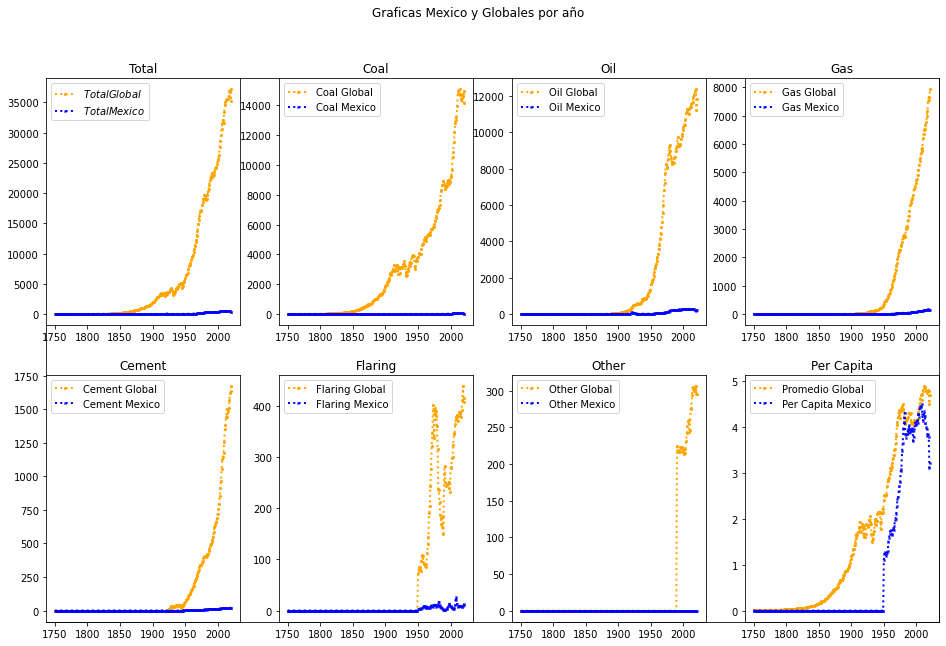

In [11]:
#Graficamos los datos, en un subplot para poder mostrarlos todos juntos
fig , ax = plt.subplots(figsize=(16,10))
fig.suptitle("Graficas Mexico y Globales por año")
ax.set_xticks([])
ax.set_yticks([])

gs = fig.add_gridspec(2,4)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(indic,g_list[0], 'o', color = 'orange', ms = 2, lw=2 , ls =':', label = '$Total Global$')
ax1.plot(indic,mx_list[0], 'x', color = 'blue', ms = 2, lw=2 , ls =':', label = '$Total Mexico$')
ax1.legend()
ax1.set_title('Total')
#ax1.set_yticks([])

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(indic,g_list[1], 'o', color = 'orange', ms = 2, lw=2 , ls =':', label = columnas[2])
ax2.plot(indic,mx_list[1], 'x', color = 'blue', ms = 2, lw=2 , ls =':', label = columnas[3])
ax2.legend()
ax2.set_title('Coal')
#ax2.set_yticks([])

ax3 = fig.add_subplot(gs[0,2])
ax3.plot(indic,g_list[2], 'o', color = 'orange', ms = 2, lw=2 , ls =':', label = columnas[4])
ax3.plot(indic,mx_list[2], 'x', color = 'blue', ms = 2, lw=2 , ls =':', label = columnas[5])
ax3.legend() ; ax3.set_title('Oil')
#ax3.set_yti,ks([])

ax4 = fig.add_subplot(gs[0,3])
ax4.plot(indic,g_list[3], 'o', color = 'orange', ms = 2, lw=2 , ls =':', label = columnas[6])
ax4.plot(indic,mx_list[3], 'x', color = 'blue', ms = 2, lw=2 , ls =':', label = columnas[7])
ax4.legend() ; ax4.set_title('Gas')
#ax4.set_yticks([])

ax5 = fig.add_subplot(gs[1,0])
ax5.plot(indic,g_list[4], 'o', color = 'orange', ms = 2, lw=2 , ls =':', label = columnas[8])
ax5.plot(indic,mx_list[4], 'x', color = 'blue', ms = 2, lw=2 , ls =':', label = columnas[9])
ax5.legend() ; ax5.set_title('Cement')
#ax5.set_yticks([])

ax6 = fig.add_subplot(gs[1,1])
ax6.plot(indic,g_list[5], 'o', color = 'orange', ms = 2, lw=2 , ls =':', label = columnas[10])
ax6.plot(indic,mx_list[5], 'x', color = 'blue', ms = 2, lw=2 , ls =':', label = columnas[11])
ax6.legend() ; ax6.set_title('Flaring')
#ax6.set_yticks([])

ax7 = fig.add_subplot(gs[1,2])
ax7.plot(indic,g_list[6], 'o', color = 'orange', ms = 2, lw=2 , ls =':', label = columnas[12])
ax7.plot(indic,mx_list[6], 'x', color = 'blue', ms = 2, lw=2 , ls =':', label = columnas[13])
ax7.legend() ; ax7.set_title('Other')
#ax7.set_yticks([])

ax8 = fig.add_subplot(gs[1,3])
ax8.plot(indic,g_list[7], 'o', color = 'orange', ms = 2, lw=2 , ls =':', label = 'Promedio Global')
ax8.plot(indic,mx_list[7], 'x', color = 'blue', ms = 2, lw=2 , ls =':', label = columnas[15])
ax8.legend() ; ax8.set_title('Per Capita')
#ax8.set_yticks([])

In [19]:
#Extraer Datos de los paises pertenecientes al G20 y graficar el punto anterior
G20 = ['Germany','Saudi Arabia','Argentina','Australia','Brazil','Canada','China','South Korea','USA','France','India','Indonesia','Italy','Japan','Mexico','Russia','United Kingdom','South Africa','Turkey']
Datos = ['Total','Coal','Oil','Gas','Cement','Flaring','Other','Per Capita']
df_1 = df_1.fillna(0)
#cada sublista de la lista data, corresponde a cada categoria, total,coal,gas,etc
#dentro de cada una de estas sublistas habra 19 sublistas, cada una correspondiente a un pais, dentro de cada una de estas 19
#sublistas estaran los valores de todos los años de la categoria en la que se encuentren
data = [[],[],[],[],[],[],[],[]]
for i in range(8):
    for j in range(19):
        dloc = df_1['Country'] == G20[j]#generamos un dataframe booleano que tiene true en la ubicacion del pais del G20
        data[i].append(np.array(df_1[[Datos[i]]].loc[dloc]))#a la sublista i-esima agregamos una lista con todos los valores
        # de la columna correspondiente del dataframe(coal,gas,etc), pero unicamente agregamos los que cumplen el filtro booleano


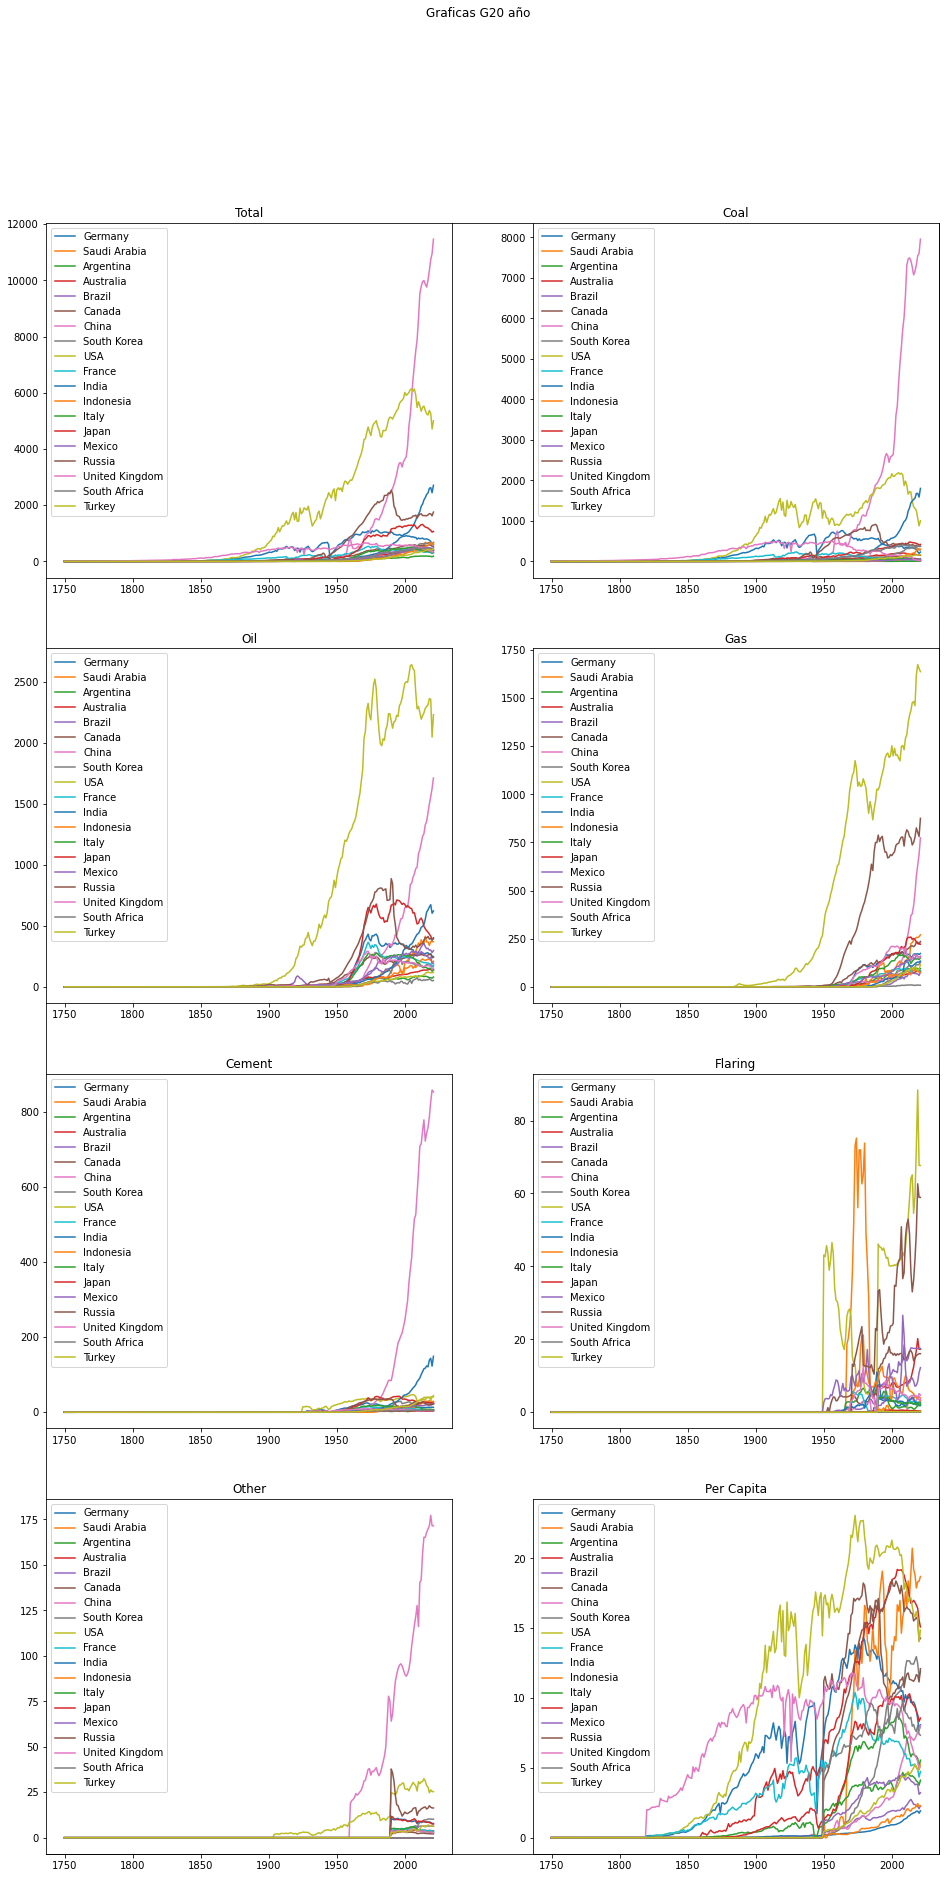

In [190]:
fig1 , axx = plt.subplots(figsize=(16,30))
fig1.suptitle("Graficas G20 por año")
gs = fig1.add_gridspec(4,2)
axx.set_xticks([])
axx.set_yticks([])
p = 0
for l in range(4):
    for m in range(2):
        axTotal = fig1.add_subplot(gs[l,m])
        y = 0
        for i in data[p]:
            axTotal.plot(indic,i,label = G20[y])
            y += 1
        axTotal.legend(loc = 'upper left')
        axTotal.set_title(Datos[p])
        p = p + 1



El pais que mas contamina en Total es : China con un valor de =  11472.369170999998
El pais que mas contamina en Coal es : China con un valor de =  7955.985419
El pais que mas contamina en Oil es : USA con un valor de =  2644.236598
El pais que mas contamina en Gas es : USA con un valor de =  1673.9991
El pais que mas contamina en Cement es : China con un valor de =  858.2326130000001
El pais que mas contamina en Flaring es : USA con un valor de =  88.383147
El pais que mas contamina en Other es : China con un valor de =  177.256846
El pais que mas contamina en Per Capita es : USA con un valor de =  23.081082000000002
Los 3 países que más contaminan en Total son:
Country
USA       421906.855203
China     249352.817660
Russia    117547.631435
Name: Total, dtype: float64
Los 3 países que más contaminan en Coal son:
Country
China      187073.411887
USA        175444.989793
Germany     64665.842957
Name: Coal, dtype: float64
Los 3 países que más contaminan en Oil son:
Country
USA       161

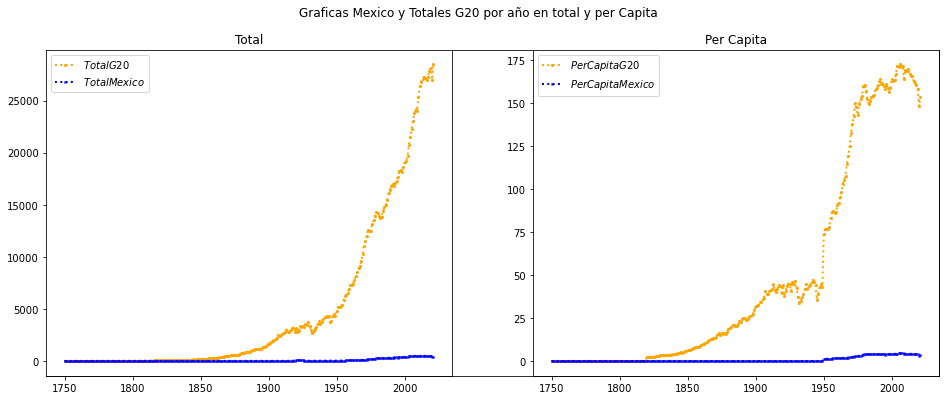

In [21]:
#Cuales son los paises que mas contaminan en cada uno de los casos
#Considerando solo la emisión de los paises del G20,¿con que porcentaje contribuye México al Total y Per Capita?
maximos = [[],[],[],[],[],[],[],[]]
#lista de maximos por pais y por categoria, cada sublista corresponde a una categoria, total, coal, etc entonces 
#cada elemento de la sublista contiene el maximo de cada pais en esa categoria, ahora buscamos el maximo de todos los maximos
p = 0
for i in range(8):
    for j in data[p]:
        maximos[i].append(np.max(j))
    p = p + 1  
#obtenemos el maximo de cada sublista, que nos dice cual fue el valor maximo en esa categoria, y obetenemos le indice de ese valor 
#que no dice que pais fue el que tuvo ese valor maximo
for i in range(8):
    maximo = max(maximos[i])
    o = maximos[i].index(maximo)
    print("El pais que mas contamina en",Datos[i],"es :",G20[o],"con un valor de = ",maximo)


#Calcular los 3 países que más contaminan en cada categoría
df_G20 = df_1[df_1['Country'].isin(G20)] 
for i in Datos:
    datos_categoría = df_G20.groupby('Country')[i].sum().sort_values(ascending=False)
    top_3 = datos_categoría.head(3)
    print(f'Los 3 países que más contaminan en {i} son:')
    print(top_3)
    
#Para encontrar el porcentaje que contribuye mexico al total y per capita de todos los paises del G20 sumamos todos los valores
#de todos los paises y sacamos que porcentaje es la parte de mexico, lo haremos cada año
TotalesG20 = [[],[]] #la primer sublista es para el total por año, y la segunda es para el percapita por año
#con este for asignamos a la primera sublista los valores totales del g20 por año
for j in range(len(indic)):
    totalG20 = 0
    for i in range(19):
        totalG20 = totalG20 + data[0][i][j]
    TotalesG20[0].append(totalG20)
#con este for asignamos a la segunda sublista los valores per capita del g20 por año    
for j in range(len(indic)):
    percapitaG20 = 0
    for i in range(19):
        percapitaG20 = percapitaG20 + data[7][i][j]
    TotalesG20[1].append(percapitaG20)
#graficamos
fig , ax = plt.subplots(figsize=(16,6))
fig.suptitle("Graficas Mexico y Totales G20 por año en total y per Capita")
ax.set_xticks([])
ax.set_yticks([])
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(indic,TotalesG20[0], 'o', color = 'orange', ms = 2, lw=2 , ls =':', label = '$Total G20$')
ax1.plot(indic,data[0][14], 'x', color = 'blue', ms = 2, lw=2 , ls =':', label = '$Total Mexico$')
ax1.legend()
ax1.set_title('Total')

ax2 = fig.add_subplot(gs[0,1])
ax2.plot(indic,TotalesG20[1], 'o', color = 'orange', ms = 2, lw=2 , ls =':', label = '$PerCapita G20$')
ax2.plot(indic,data[7][14], 'x', color = 'blue', ms = 2, lw=2 , ls =':', label = '$PerCapita Mexico$')
ax2.legend()
ax2.set_title('Per Capita')

print("En el año 2021 Mexico contamino en total al G20 con un porcentaje de = ",float((data[0][14][-1]*100)/TotalesG20[0][-1]),"%")
print("En el año 2021 Mexico contamino PerCapita al G20 con un porcentaje de = ",float((data[7][14][-1]*100)/TotalesG20[1][-1]),"%")

In [1]:
import pandas as pd
import numpy as np

In [4]:
n = 100
a = np.random.randn(n,2)*300 + 1000
b = nums = np.random.randint(100, 3000, (n, 2))
c = np.append(a, b, axis=1)
nums = np.random.randn(n,4)
letters = np.reshape(list("abcd")*int(n/4), (n,1))
values = np.append(c, letters, axis = 1)
fecha = pd.date_range("20230915", periods=n)

df = pd.DataFrame(values, index=fecha, columns=list("VWXYZ"))
types_dict = {}
for i in df.columns[0:-1]:
    types_dict.update({i : 'float64'})

df = df.astype(types_dict)

df.head()

,V,W,X,Y,Z
2023-09-15,927.661201,1118.572499,1521.0,427.0,a
2023-09-16,907.235733,1294.463050,1482.0,2273.0,b
2023-09-17,684.847854,1401.736607,895.0,1527.0,c
2023-09-18,1386.841502,1704.506768,1960.0,1608.0,d
2023-09-19,489.000368,530.191417,1277.0,965.0,a


In [8]:
df.groupby('Z').sum()

,V,W,X,Y
Z,,,,
a,25349.208856,23397.778237,38320.0,29392.0
b,25114.690767,23967.390485,38409.0,37609.0
c,26104.869348,27249.878717,50139.0,40694.0
d,27397.648699,27699.361816,48766.0,32447.0


<AxesSubplot:xlabel='Z'>

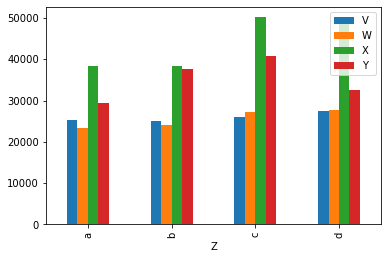

In [5]:
df.groupby('Z').sum().plot.bar()

<AxesSubplot:>

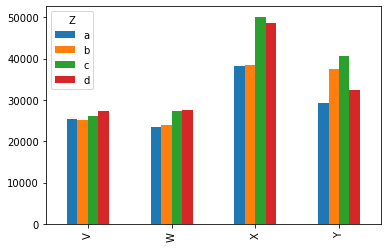

In [6]:
df.groupby('Z').sum().T.plot.bar()

<AxesSubplot:>

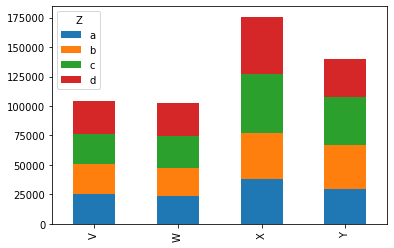

In [7]:
df.groupby('Z').sum().T.plot.bar(stacked = True)